In [3]:
# This file was used for the base CNN to analyze the results.csv file.


# Reads in the results file
# graphs different metrics using micro accuracy as color

import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
import utils


"""
NOTE: keep patience and min_pct_improvement at 5, 1 for purposes of comparison

Results of the first arch search, 2427 models explored:
- all other val metrics could be perfect and you could still get as low as 90% micro val accuracy

- 1 to 2 layers, BUT was affected by bias: more layers = more chance to get an invalid combination of hyperparameters, so many fewer 4-layer models than 1-layer models were evaluated. Regardless, as pie graphs go from all models to higher performing models, the percent of 1 and 2 layer models increased, while 3 and 4 decreased.
- dropout of 0-0.6 (the range of given values) was all high performing
- stride was 1 80% of the time for highest models on layer 1, rarely 2, never 3. On layer 2, it was 50/50 stride 1 or 2.
- kernel size was mostly 5-9, sometimes 11, not too often 3
- pooling kernel size ranged across all given values, 0-3
- output channels were mostly large, 128 and 256, 
- batch size was mostly 16 or 32, but 64 was not uncommon

next steps:
- raise conv channels range and make more granular, [5, 6, 7, 8, 9]
"""

'\nNOTE: keep patience and min_pct_improvement at 5, 1 for purposes of comparison\n\nResults of the first arch search, 2427 models explored:\n- all other val metrics could be perfect and you could still get as low as 90% micro val accuracy\n\n- 1 to 2 layers, BUT was affected by bias: more layers = more chance to get an invalid combination of hyperparameters, so many fewer 4-layer models than 1-layer models were evaluated. Regardless, as pie graphs go from all models to higher performing models, the percent of 1 and 2 layer models increased, while 3 and 4 decreased.\n- dropout of 0-0.6 (the range of given values) was all high performing\n- stride was 1 80% of the time for highest models on layer 1, rarely 2, never 3. On layer 2, it was 50/50 stride 1 or 2.\n- kernel size was mostly 5-9, sometimes 11, not too often 3\n- pooling kernel size ranged across all given values, 0-3\n- output channels were mostly large, 128 and 256, \n- batch size was mostly 16 or 32, but 64 was not uncommon\n\

In [11]:
# Read the CSV file into a DataFrame
df = pd.read_csv('./datasets/v4_combined_reference_sequences.csv', sep=";")

# Calculate and print the average and standard deviation of the sequence length before filtering
avg_seq_length = df['seq'].apply(len).mean()
std_seq_length = df['seq'].apply(len).std()
print(f"Average sequence length before filtering: {avg_seq_length}")
print(f"Standard deviation of sequence length before filtering: {std_seq_length}")

# Calculate and print the average and standard deviation of the number of sequences per 'species_cat' before filtering
avg_seqs_per_species_before = df['species_cat'].value_counts().mean()
std_seqs_per_species_before = df['species_cat'].value_counts().std()
print(f"Average number of sequences per species_cat before filtering: {avg_seqs_per_species_before}")
print(f"Standard deviation of sequences per species_cat before filtering: {std_seqs_per_species_before}")

# Remove rows where 'species_cat' is unique
filtered_df = df[df.duplicated('species_cat', keep=False)]

# Calculate and print the average and standard deviation of the sequence length after filtering
avg_seq_length_filtered = filtered_df['seq'].apply(len).mean()
std_seq_length_filtered = filtered_df['seq'].apply(len).std()
print(f"Average sequence length after filtering: {avg_seq_length_filtered}")
print(f"Standard deviation of sequence length after filtering: {std_seq_length_filtered}")

# Calculate and print the average and standard deviation of the number of sequences per 'species_cat' after filtering
avg_seqs_per_species_after = filtered_df['species_cat'].value_counts().mean()
std_seqs_per_species_after = filtered_df['species_cat'].value_counts().std()
print(f"Average number of sequences per species_cat after filtering: {avg_seqs_per_species_after}")
print(f"Standard deviation of sequences per species_cat after filtering: {std_seqs_per_species_after}")


Average sequence length before filtering: 64.03513909224012
Standard deviation of sequence length before filtering: 4.99782308355014
Average number of sequences per species_cat before filtering: 1.8559782608695652
Standard deviation of sequences per species_cat before filtering: 1.3260817370615148
Average sequence length after filtering: 63.90233545647558
Standard deviation of sequence length after filtering: 4.357802352396064
Average number of sequences per species_cat after filtering: 3.019230769230769
Standard deviation of sequences per species_cat after filtering: 1.341502065433846


: 

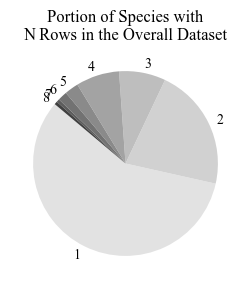

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# Set the font to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'

# Load the dataset

df = pd.read_csv('datasets/v4_combined_reference_sequences.csv', sep=';')
# df = pd.read_csv('datasets/train_no_dup.csv', sep=',')

# Group the data by species and count the number of sequences for each
species_counts = df.groupby('species_cat')['seq'].count()

# Count the number of species that have 1, 2, ..., 6 rows
row_counts = species_counts.value_counts().sort_index()

# Create a pie chart with a less colorful color scheme
colors = plt.cm.Greys(np.linspace(0.2, 0.8, row_counts.size))
plt.figure(figsize=(3, 3))
plt.pie(row_counts, labels=row_counts.index, startangle=140, colors=colors)

# Set the title
plt.title('Portion of Species with\nN Rows in the Overall Dataset')

# Show the plot
plt.show()

In [6]:
df = pd.read_csv('datasets/train_no_oversample.csv', sep=',')
# Group the data by species and count the number of sequences for each
species_counts = df.groupby('species_cat')['seq'].count()

# Create a bar plot
species_counts.plot(kind='bar', figsize=(12, 6))

# Set the title and labels
plt.title('Number of Sequences per Species')
plt.xlabel('Species')
plt.ylabel('Number of Sequences')

# Show the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/train_no_dup.csv'

In [4]:
# If you want to use this code, read it carefully and make sure it is
# doing what you want. This is mostly just for messing around and
# analyzing the dataset, and has been changed many times for this reason.

# overall_df = pd.read_csv('datasets/v4_combined_reference_sequences.csv', sep=';')
df = pd.read_csv('datasets/train_with_dup.csv', sep=',')

overall_df = df

print("Before anything:")
print(overall_df.shape)
utils.print_descriptive_stats(overall_df, ['species'])

overall_df = utils.remove_species_with_too_few_sequences(
            overall_df, 'species', 2, False
        )
print("After removal of sparse species:")
print(overall_df.shape)
utils.print_descriptive_stats(overall_df, ['species'])

# train, test = utils.stratified_split(
#             overall_df,
#             'species',
#             0.3
#         )
train = overall_df

# print("For the train set:")
# print(train.shape)
# utils.print_descriptive_stats(train, ['species'])
# print("For the test set:")
# print(test.shape)
# utils.print_descriptive_stats(test, ['species'])

species_counts = train.groupby('species')['seq'].count()
print(species_counts)
# Find the number of species that only have one sequence
num_species_with_one_seq = (species_counts == 1).sum()
print(f"\nThe number of species that only have one sequence is {num_species_with_one_seq}.")


train = utils.oversample_underrepresented_species(train, 'species')
print("For train after oversampling:")
print(train.shape)
utils.print_descriptive_stats(train, ['species'])




print("END")


overall_df['seq_length'] = overall_df['seq'].str.len()
print(f"MEAN: {overall_df['seq_length'].mean()}")

plt.figure(figsize=(10,6))
overall_df['seq_length'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Bases in Sequence')
plt.ylabel('Frequency')
plt.title('Sequence Lengths') # for Species with >2 Sequences
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/train_with_dup.csv'

In [ ]:
df = pd.read_csv('results.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_sorted = df.sort_values(['val_macro_f1-score', 'val_micro_accuracy'], ascending=False)
# df_sorted.to_csv('results.csv', index=False)
df = df_sorted
df = df[df['k_iters'] >= 5]
# df.head(1000)

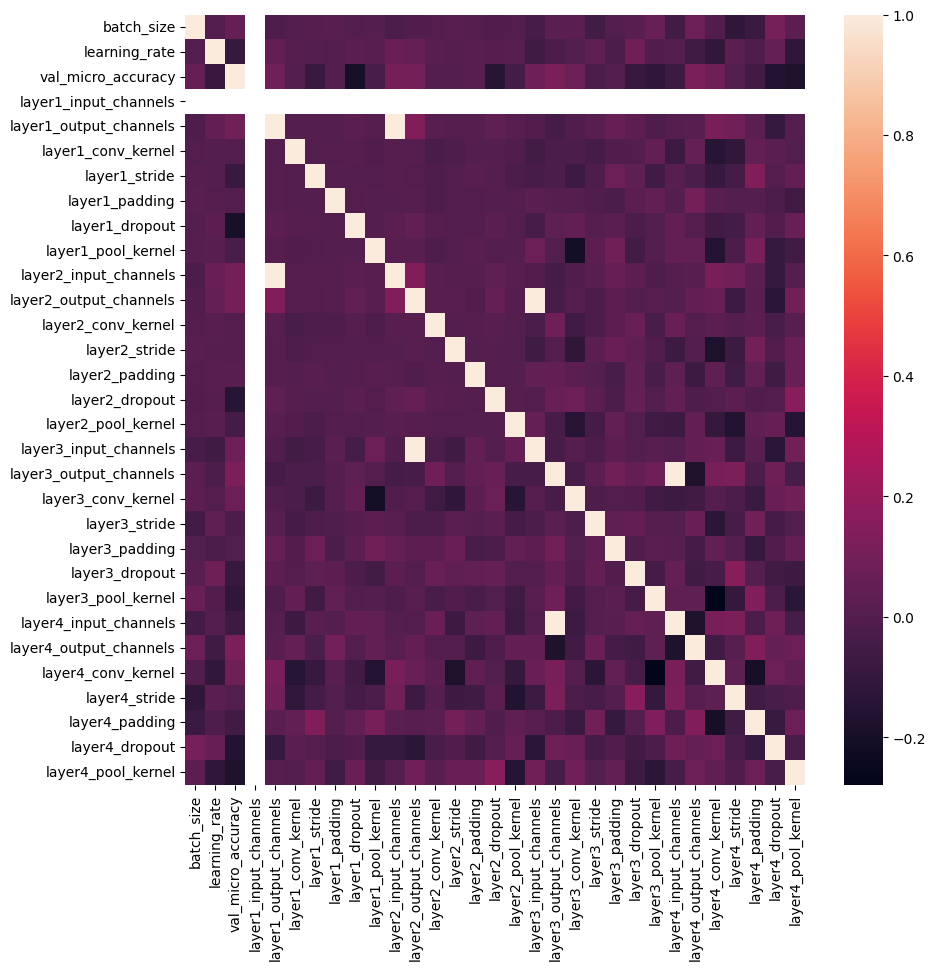

In [ ]:
# Not useful since it doesn't relate the combinations to accuracy, only to each other
# Select the columns
columns = ['batch_size', 'learning_rate', 'val_micro_accuracy']
for i in range(1, 5):
    columns.extend([f'layer{i}_input_channels', f'layer{i}_output_channels', f'layer{i}_conv_kernel', f'layer{i}_stride', f'layer{i}_padding', f'layer{i}_dropout', f'layer{i}_pool_kernel'])

df_selected = df[columns]

# Calculate the correlation matrix
corr = df_selected.corr()

# Create a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=False, fmt=".2f")

# Display the plot
plt.show()

[100.0, 49.792197345488674, 0.5295616034320938, 0.06703311435849457]
[99.99182271649359, 62.24139340910949, 3.279090686074082, 0.801373783629078]


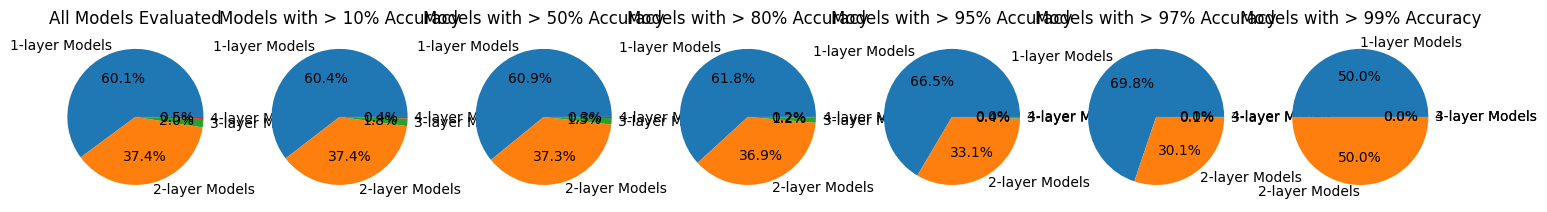

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame based on the accuracy
df_99 = df[df['val_micro_accuracy'] > 0.985]
df_97 = df[df['val_micro_accuracy'] > 0.97]
df_95 = df[df['val_micro_accuracy'] > 0.95]
df_80 = df[df['val_micro_accuracy'] > 0.80]
df_50 = df[df['val_micro_accuracy'] > 0.50]
df_10 = df[df['val_micro_accuracy'] > 0.10]
df_00 = df[df['val_micro_accuracy'] > 0.00]

# Calculate the percentages for each filtered DataFrame
nan_99_percent = [(1 - df_99['layer{}_input_channels'.format(i)].isna().mean())*100 for i in range(1, 5)]
nan_97_percent = [(1 - df_97['layer{}_input_channels'.format(i)].isna().mean())*100 for i in range(1, 5)]
nan_95_percent = [(1 - df_95['layer{}_input_channels'.format(i)].isna().mean())*100 for i in range(1, 5)]
nan_80_percent = [(1 - df_80['layer{}_input_channels'.format(i)].isna().mean())*100 for i in range(1, 5)]
nan_50_percent = [(1 - df_50['layer{}_input_channels'.format(i)].isna().mean())*100 for i in range(1, 5)]
nan_10_percent = [(1 - df_10['layer{}_input_channels'.format(i)].isna().mean())*100 for i in range(1, 5)]
nan_00_percent = [(1 - df_00['layer{}_input_channels'.format(i)].isna().mean())*100 for i in range(1, 5)]

# Create labels
labels = ['1-layer Models', '2-layer Models', '3-layer Models', '4-layer Models']

print(nan_95_percent)
print(nan_00_percent)

# Create the pie charts
fig, axs = plt.subplots(1, 7, figsize=(18, 6))

# 99% accuracy
axs[6].pie(nan_99_percent, labels=labels, autopct='%1.1f%%')
axs[6].set_title('Models with > 99% Accuracy')

# 97% accuracy
axs[5].pie(nan_97_percent, labels=labels, autopct='%1.1f%%')
axs[5].set_title('Models with > 97% Accuracy')

# 95% accuracy
axs[4].pie(nan_95_percent, labels=labels, autopct='%1.1f%%')
axs[4].set_title('Models with > 95% Accuracy')

# 80% accuracy
axs[3].pie(nan_80_percent, labels=labels, autopct='%1.1f%%')
axs[3].set_title('Models with > 80% Accuracy')

# 50% accuracy
axs[2].pie(nan_50_percent, labels=labels, autopct='%1.1f%%')
axs[2].set_title('Models with > 50% Accuracy')

# 10% accuracy
axs[1].pie(nan_10_percent, labels=labels, autopct='%1.1f%%')
axs[1].set_title('Models with > 10% Accuracy')

# all explored models
axs[0].pie(nan_00_percent, labels=labels, autopct='%1.1f%%')
axs[0].set_title('All Models Evaluated')

plt.show()

In [ ]:
df_agg = df.groupby(['batch_size', 'learning_rate']).mean().reset_index()
pivot_table = df_agg.pivot('batch_size', 'learning_rate', 'val_micro_accuracy')
sns.heatmap(pivot_table)
plt.show()

In [ ]:
df_agg = df.groupby(['layer1_input_channels', 'layer1_output_channels']).mean().reset_index()
pivot_table = df_agg.pivot('layer1_input_channels', 'layer1_output_channels', 'val_micro_accuracy')
sns.heatmap(pivot_table)
plt.show()

In [ ]:
df_agg = df.groupby(['layer2_input_channels', 'layer2_output_channels']).mean().reset_index()
pivot_table = df_agg.pivot('layer2_input_channels', 'layer2_output_channels', 'val_micro_accuracy')
sns.heatmap(pivot_table)
plt.show()

In [ ]:
df_agg = df.groupby(['layer3_input_channels', 'layer3_output_channels']).mean().reset_index()
pivot_table = df_agg.pivot('layer3_input_channels', 'layer3_output_channels', 'val_micro_accuracy')
sns.heatmap(pivot_table)
plt.show()

In [ ]:
df_agg = df.groupby(['layer4_input_channels', 'layer4_output_channels']).mean().reset_index()
pivot_table = df_agg.pivot('layer4_input_channels', 'layer4_output_channels', 'val_micro_accuracy')
sns.heatmap(pivot_table)
plt.show()

In [ ]:
df_agg = df.groupby(['layer1_conv_kernel', 'layer1_conv_kernel']).mean().reset_index()
pivot_table = df_agg.pivot('layer1_conv_kernel', 'layer1_conv_kernel', 'val_micro_accuracy')
sns.heatmap(pivot_table)
plt.show()

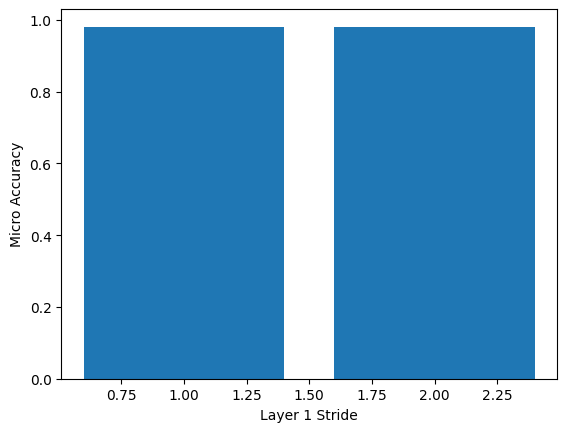

In [ ]:
plt.bar(df['layer1_stride'], df['val_micro_accuracy'])
plt.xlabel('Layer 1 Stride')
plt.ylabel('Micro Accuracy')
plt.show()

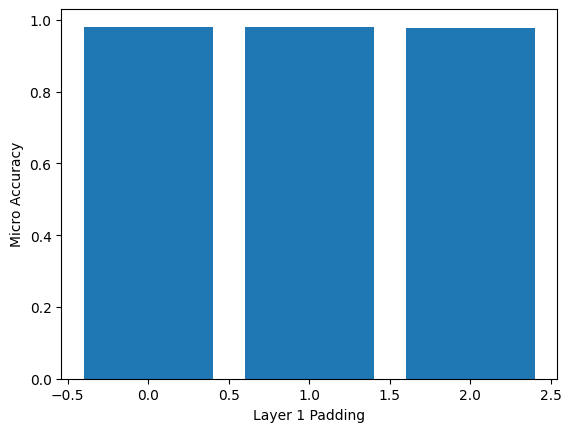

In [ ]:
plt.bar(df['layer1_padding'], df['val_micro_accuracy'])
plt.xlabel('Layer 1 Padding')
plt.ylabel('Micro Accuracy')
plt.show()

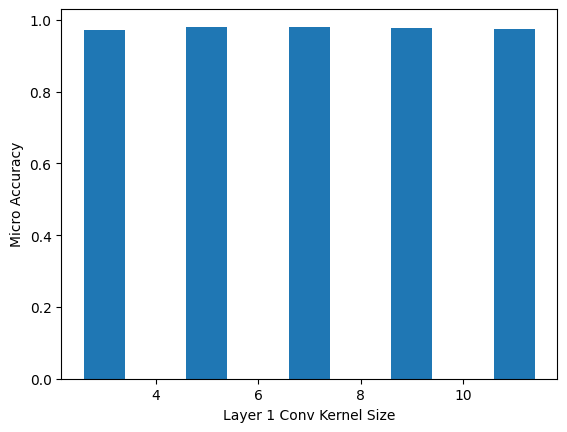

In [ ]:
plt.bar(df['layer1_conv_kernel'], df['val_micro_accuracy'])
plt.xlabel('Layer 1 Conv Kernel Size')
plt.ylabel('Micro Accuracy')
plt.show()

In [ ]:
df_agg = df.groupby(['layer1_input_channels', 'layer1_conv_kernel']).mean().reset_index()
pivot_table = df_agg.pivot('layer1_input_channels', 'layer1_conv_kernel', 'val_micro_accuracy')
sns.heatmap(pivot_table)
plt.show()

layer1_input_channels	layer1_output_channels	layer1_conv_kernel	layer1_stride	layer1_padding	layer1_dropout	layer1_pool_kernel

SyntaxError: invalid syntax (2131687882.py, line 6)